In [1]:
from rdkit import rdBase, Chem, DataStructs
from rdkit.Chem import AllChem, Draw, PandasTools
from rdkit.Chem.Draw import IPythonConsole
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("VDss_dataset_uen.csv", index_col=False)
PandasTools.AddMoleculeColumnToFrame(frame=df, smilesCol="SMILES")

,SMILES,MW,logP,VDss(L/kg),logVDss,ROMol,BitVec
0,CC(C)N(CCC(c1ccccc1)c1cc(CO)ccc1O)C(C)C,341.495,4.52530,2.410000,0.382017,,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,O=C(OC1C[N+]2(CCCOc3ccccc3)CCC1CC2)C(O)(c1cccs...,484.663,4.66680,4.300000,0.633468,,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, ..."
2,CC[C@H]1C2C[C@H]3[C@@H]4N(C)c5ccccc5[C@]45C[C@...,326.440,1.55450,4.000000,0.602060,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,C=CC[N+]12CCC34c5ccccc5N5/C=C6/C7CC8C9(CC[N+]8...,666.910,5.47560,0.320000,-0.494850,,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
4,CCCS(=O)CCCN(CC)CC(O)COc1ccc(C#N)cc1,352.500,2.16868,1.800000,0.255273,,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...
2435,C[C@@H](O)[C@H]1C(=O)N2C(C(=O)O)=C(S[C@@H]3CN[...,420.513,-1.60310,0.229087,-0.640000,,"[1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2436,CCCCC[C@H](O)CC[C@@H]1[C@H]2Cc3cccc(OCC(=O)O)c...,390.520,3.58320,0.229087,-0.640000,,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2437,Cn1c(N)c(NC(=O)NCCN)c[n+]1CC1=C(C(=O)O)N2C(=O)...,667.711,-2.56860,0.169824,-0.770000,,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2438,CCCSc1nc(N[C@@H]2C[C@H]2c2ccc(F)c(F)c2)c2nnn([...,522.578,2.01370,1.258925,0.100000,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."

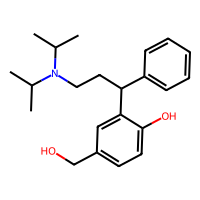
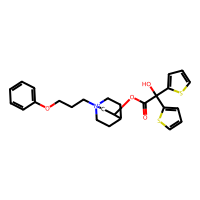
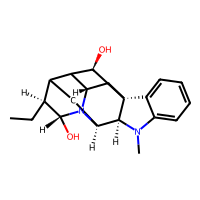
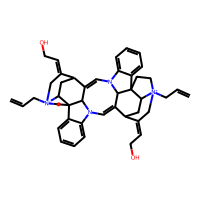
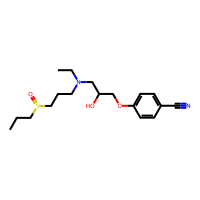
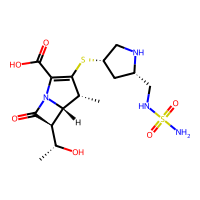
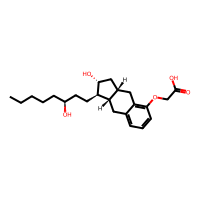
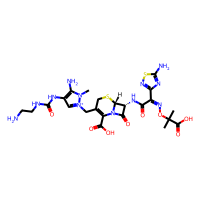
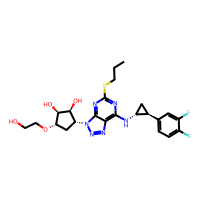
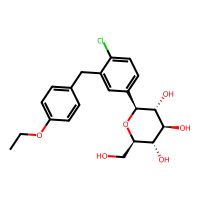

In [8]:
df

In [4]:
test_mol1 = df.ROMol[0]
test_mol2 = df.ROMol[1]
fp1 = AllChem.GetMorganFingerprintAsBitVect(test_mol1, 2, 1024)
fp2 = AllChem.GetMorganFingerprintAsBitVect(test_mol2, 2, 1024)
DataStructs.TanimotoSimilarity(fp1, fp2)

0.11392405063291139

In [5]:
morgan_fps = []
df["BitVec"] = df.ROMol.apply(lambda mol: AllChem.GetMorganFingerprintAsBitVect(mol, 2, 1024))

display(DataStructs.TanimotoSimilarity(df.BitVec[0], df.BitVec[1]))
display(DataStructs.DiceSimilarity(df.BitVec[0], df.BitVec[1]))
display(DataStructs.BulkTanimotoSimilarity(df.BitVec[0], list(df.BitVec)[1:6])) # 1st var: the ref molecule, 2nd var: mol list
display(DataStructs.BulkDiceSimilarity(df.BitVec[0], list(df.BitVec)[1:6])) # 1st var: the ref molecule, 2nd var: mol list


0.11392405063291139

0.20454545454545456

[0.11392405063291139,
 0.10526315789473684,
 0.0963855421686747,
 0.136986301369863,
 0.17857142857142858]

[0.20454545454545456,
 0.19047619047619047,
 0.17582417582417584,
 0.24096385542168675,
 0.30303030303030304]

In [6]:
smiles_list = [smi for smi in df.SMILES]
aspirin = "CC(=O)OC1=CC=CC=C1C(=O)O" #aspirin

def func(smiles_list, ref_smiles):
    mol_list = [Chem.MolFromSmiles(smi) for smi in smiles_list]
    fp_list = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, 1024) for mol in mol_list]
    fp_ref = AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(ref_smiles), 2, 1024)

    score_list = [DataStructs.TanimotoSimilarity(fp_ref, fp) for fp in fp_list]
    sorted_indices = sorted(range(len(score_list)), key=lambda i: score_list[i], reverse=True)
    top_indices = sorted_indices[:5]
    img = Draw.MolsToGridImage([mol_list[i] for i in top_indices], 
                               molsPerRow=5, 
                               subImgSize=(200, 200), 
                               legends=[f"{smiles_list[i]}\nSimilarity Score: {score_list[i]:.3f}" for i in top_indices])

    #MolsToGridTmage object should be plot by "display(img)"
    #For pop-up, should use MolsToImage object and img.show()

    display(img)

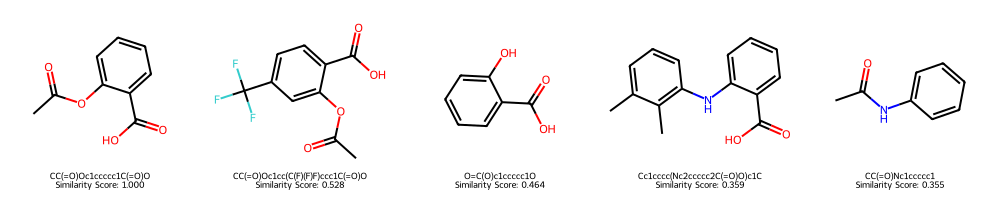

In [7]:
func(smiles_list, aspirin)